In [1]:
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BA5_2.csv')
data = data.groupby('DateTime').agg('mean')
data.reset_index(inplace = True)
data.drop(['True Vertical Depth', 'DateTime', 'Rate Of Penetration.1'], axis = 1, inplace = True)
data['Hole Depth'] = data['Hole Depth'].apply(lambda x: int(x))
data = data.groupby('Hole Depth').agg('mean')
data.reset_index(inplace = True)

In [3]:
data.head()

,Hole Depth,Bit Depth,MudWatcher Temperature (Degrees F),MudAid Temperature (Degrees F),ES Meter Temperature (Degrees F),Mud Density,Mud Watcher Density (lb/gal),MudWatcher Viscosity,ES Meter Voltage,MudAid Viscosity @ 600RPM (D.R.),...,Total Pump Output,Hook Load,Standpipe Pressure,Rate Of Penetration,Rotary RPM,Rotary Torque,Azimuth,Inclination,In Slip,Differential Pressure
0,106,98.466111,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,316.338333,57.131667,442.659722,10.601111,10.857222,1.016694,16.51,1.0,0.0,239.239778
1,109,109.250000,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,56.850000,622.500000,181.441667,30.323333,1.958500,16.51,1.0,0.0,116.263333
2,112,112.283333,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,56.383333,609.166667,184.413333,30.265000,2.156167,16.51,1.0,0.0,108.463333
3,116,116.150000,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.486667,55.700000,623.541667,248.553333,30.278333,2.203333,16.51,1.0,0.0,127.040000
4,120,120.333333,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,55.033333,620.416667,251.471667,30.208333,2.514167,16.51,1.0,0.0,133.910000


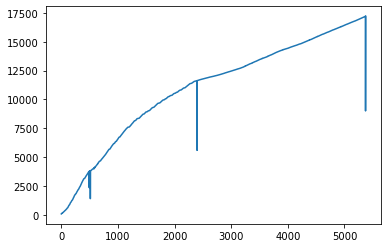

In [4]:
plt.plot(np.array(data['Bit Depth']))

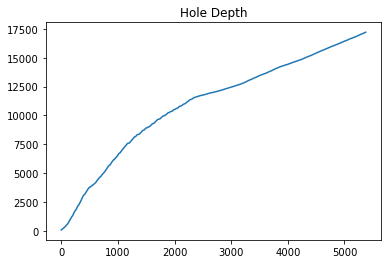

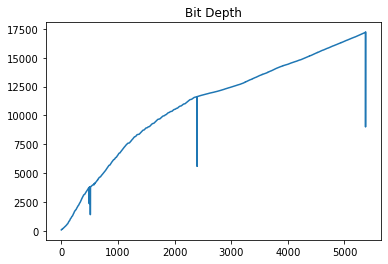

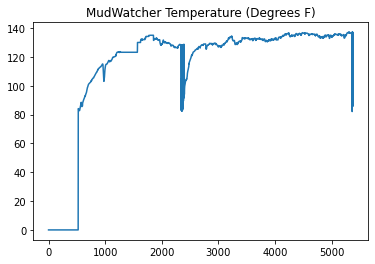

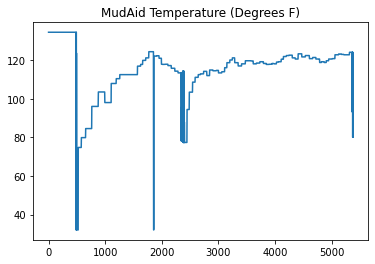

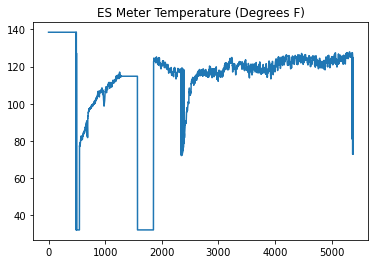

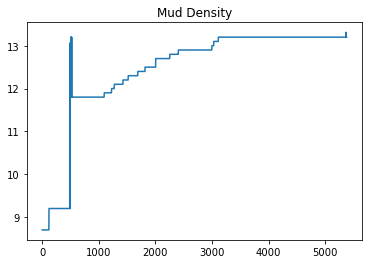

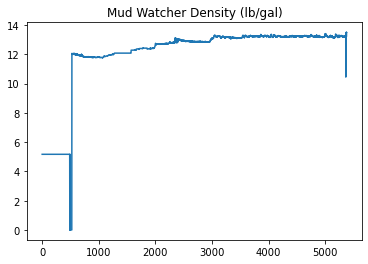

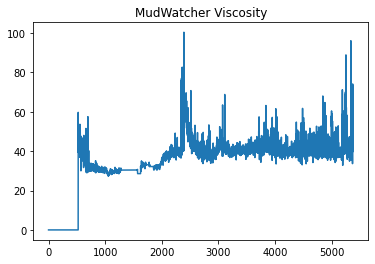

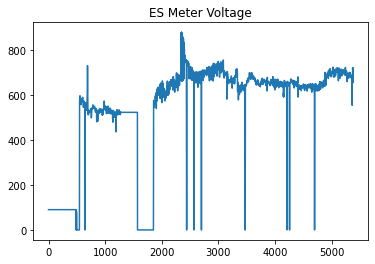

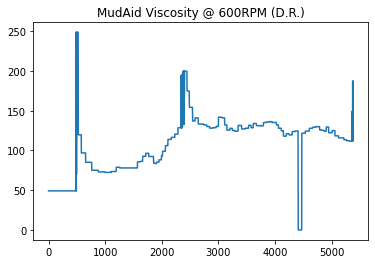

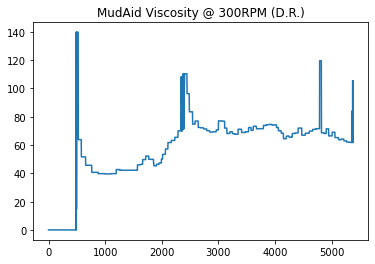

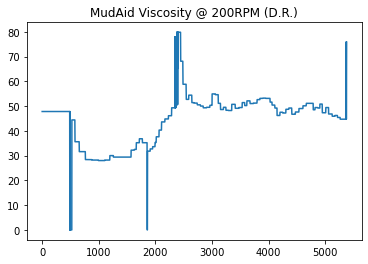

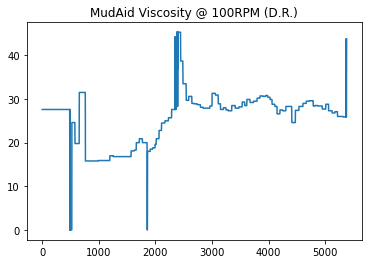

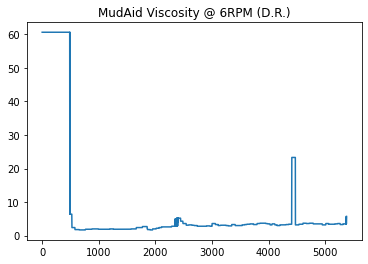

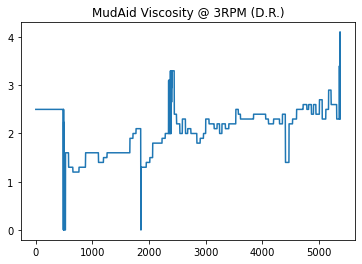

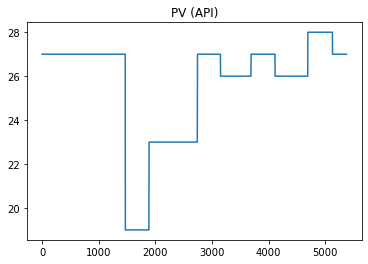

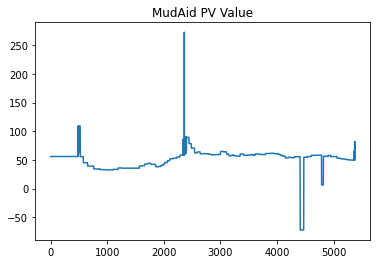

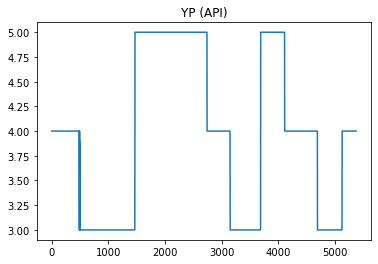

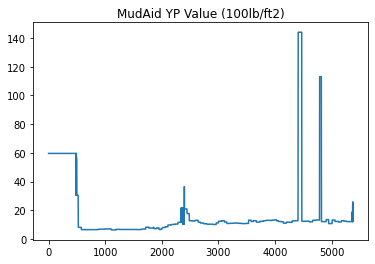

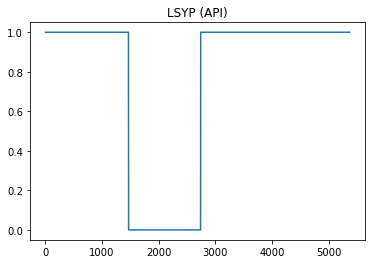

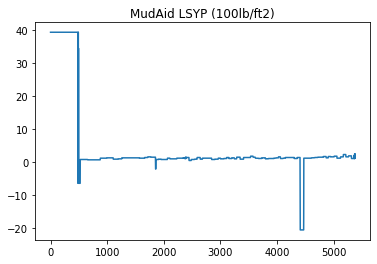

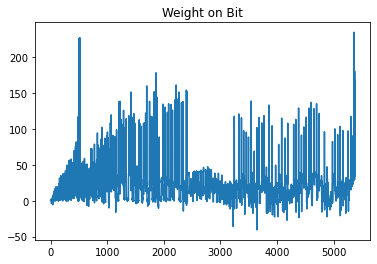

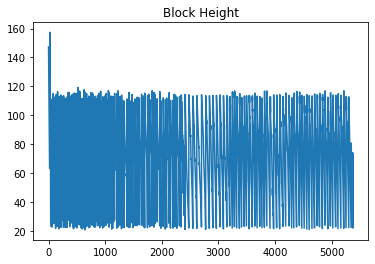

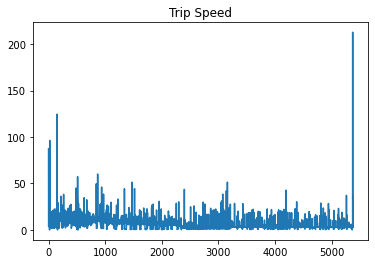

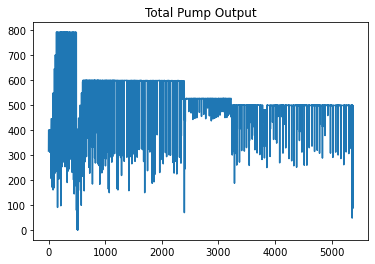

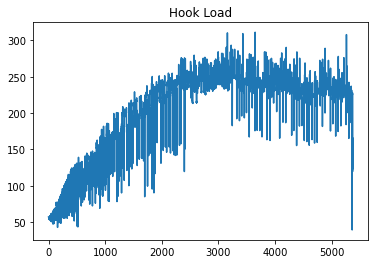

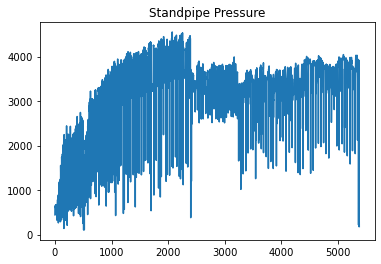

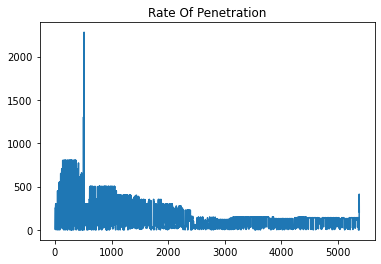

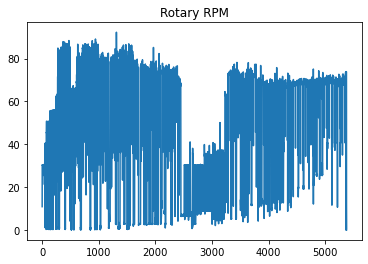

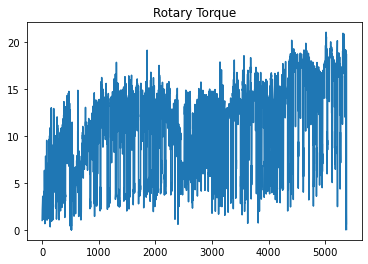

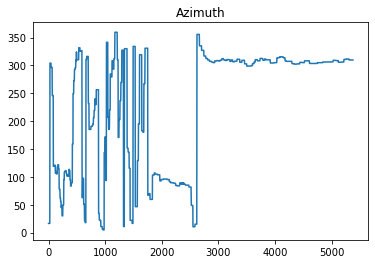

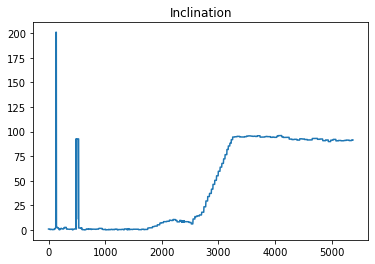

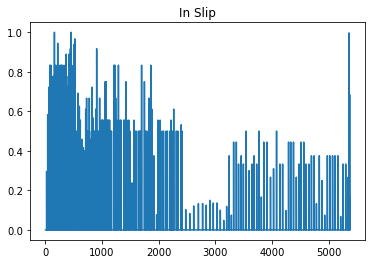

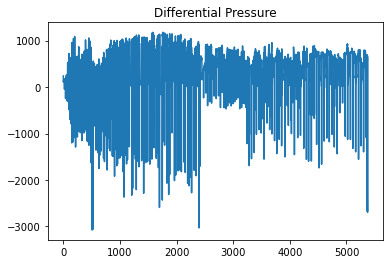

In [5]:
for col in data.columns:
    plt.plot(data[col])
    plt.title(col)
    plt.show()

In [6]:
# for col in data.columns[1:]:
#     plt.plot(data[data.columns[0]],data[col])
#     plt.title(col)
#     plt.show()

In [7]:
len(data.columns)

34

In [8]:
# import seaborn as sns


# sns.pairplot(data[data.columns[1:]], plot_kws = dict(edgecolor="none"), diag_kind="kde",
#     diag_kws={"linewidth":0, "shade": False}, corner = True)

In [14]:
# import seaborn as sns

# g = sns.PairGrid(data[data.columns[1:]])
# g = g.map(plt.scatter)

# xlabels,ylabels = [],[]

# for ax in g.axes[-1,:]:
#     xlabel = ax.xaxis.get_label_text()
#     xlabels.append(xlabel)
# for ax in g.axes[:,0]:
#     ylabel = ax.yaxis.get_label_text()
#     ylabels.append(ylabel)

# for i in range(len(xlabels)):
#     for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

# plt.show()

In [9]:
len(data.columns)

34

In [16]:
# fig, axs = plt.subplots( 36, 36 , figsize = (36*4,35*4))
# for i in range(36):
#     axs[i,i].hist(data[data.columns[i+1]], bins = 30)
#     for j in range(i):
#         axs[i,j].plot(data[data.columns[j+1]], data[data.columns[i+1]], 'o')
#         axs[i,j].set_xlabel(data.columns[j+1])
#         axs[i,j].set_ylabel(data.columns[i+1])      
#     for j in range(i+1, 36):
#         axs[i,j].hist2d(data[data.columns[j+1]], data[data.columns[i+1]], bins = 100, cmap ="gray", norm = colors.LogNorm(), )
#         axs[i,j].set_xlabel(data.columns[j+1])
#         axs[i,j].set_ylabel(data.columns[i+1])
# plt.tight_layout()
# plt.savefig('2Dplots_2.png')
# plt.show()

In [10]:
# from scipy.stats import gaussian_kde

# for i in range(35):
#     for j in range(i):
#         plt.figure(figsize = (4,4))
#         plt.plot(data[data.columns[j+1]], data[data.columns[i+1]], 'o')
#         plt.xlabel(data.columns[j+1])
#         plt.ylabel(data.columns[i+1]) 
#         plt.tight_layout()
#         plt.savefig('2DPLOTS_2/' + data.columns[j+1].replace('/','.') + '__vs__' + data.columns[i+1].replace('/','.') + '.png', dpi = 500)
#         plt.show()
        
#         xy = np.vstack([data[data.columns[j+1]],data[data.columns[i+1]]])
#         z = gaussian_kde(xy)(xy)
        
        
#         plt.figure(figsize = (4,4))
#         plt.scatter(data[data.columns[j+1]], data[data.columns[i+1]], c = z, s = 100 )
#         plt.xlabel(data.columns[j+1])
#         plt.ylabel(data.columns[i+1]) 
#         plt.tight_layout()
#         plt.savefig('2DPLOTS_2/2D histogram ' + data.columns[j+1].replace('/','.') + '__vs__' + data.columns[i+1].replace('/','.') + '.png', dpi = 500)
#         plt.show()

In [11]:
def make_df(data, shift, cols1, cols2, main_col = 'Hole Depth'):
    result = pd.DataFrame()
    result[main_col] = data[main_col]
    for col in cols1:
        result[col] = data[col]
    for col in cols2:
        result[col] = np.nan
        for i in result[main_col]:
            try:
                result.loc[result[main_col] == i, col] = data[col][data[main_col] == (i + shift)].iloc[0]
            except:
                # print('no data for depht = ' + str(i))
                continue
                
    return result.dropna()

# Predicting mud properties from the other features

In [13]:
cols1 = ['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure']

cols2 = ['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)']

data10 = make_df(data, 10, cols1, cols2)

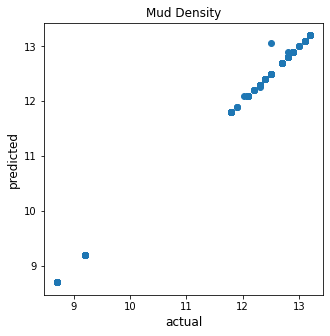

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Mud Density', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
# plt.savefig('example_ Mud Density all magnitudes.png', dpi = 500)
plt.show()

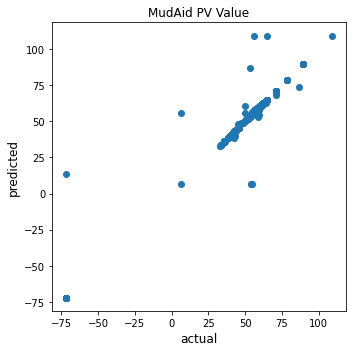

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['MudAid PV Value']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=60)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-100,150)
# plt.xlim(-100,150)
plt.title('MudAid PV Value', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ MudAid PV Value all magnitudes.png', dpi = 500)
plt.show()

# Predicting MudWatcher Temperature (Degrees F)


In [57]:
cols2

['Mud Density',
 'MudAid PV Value',
 'MudAid Temperature (Degrees F)',
 'PV (API)',
 'MudAid Viscosity @ 6RPM (D.R.)',
 'ES Meter Voltage',
 'MudAid Viscosity @ 200RPM (D.R.)',
 'MudAid Viscosity @ 300RPM (D.R.)',
 'MudAid Viscosity @ 600RPM (D.R.)']

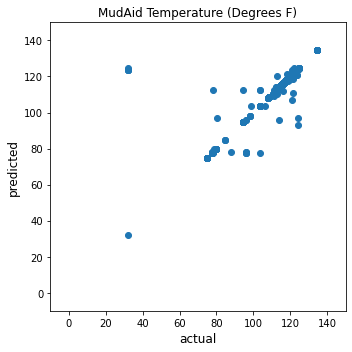

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = data10[cols1]

Y = data10[['MudAid Temperature (Degrees F)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
plt.ylim(-10,150)
plt.xlim(-10,150)
plt.title('MudAid Temperature (Degrees F)', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
# plt.savefig('example_ MudWatcher Temperature all magnitudes.png', dpi = 500)
plt.show()

# multitarget regression

In [61]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 52.281 (3.302)


In [21]:
from sklearn.metrics import mean_squared_error

def get_mse(y_test, y_pred):
    me = []
    for i in range(len(y_test.columns)):
        mse1 = mean_squared_error(y_pred.T[i], y_test[y_test.columns[i]])
        # print(mse1)
        me.append(mse1)
    return min(me), max(me), np.mean(me), me

In [25]:
cols1 = ['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure']

cols2 = ['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)']

data10 = make_df(data, 50, cols1, cols2)

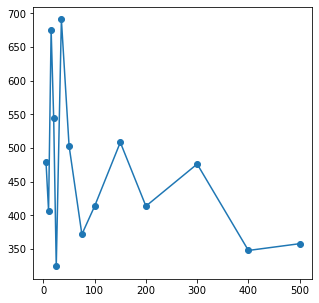

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100, 150, 200, 300, 400, 500]
mse_values = []
for i in md:
    model = DecisionTreeRegressor(max_depth=i, min_samples_split=4)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
# plt.xscale('log')
plt.show()

In [196]:
min(mse_values)

13.856953028450231

In [195]:
md[argmin(mse_values)]

15

389.247460898582


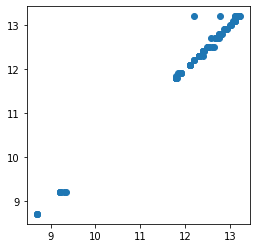

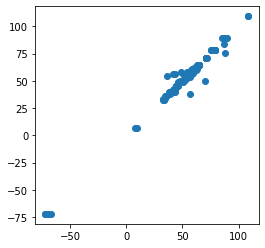

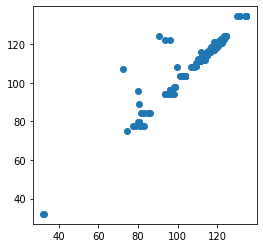

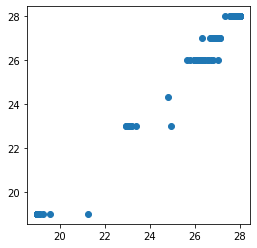

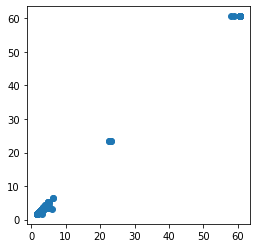

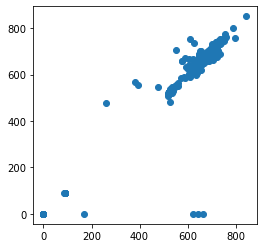

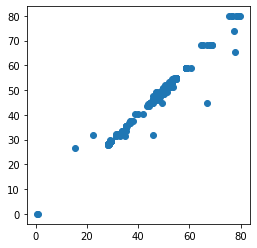

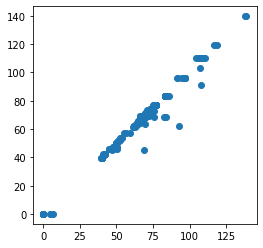

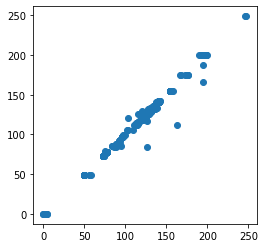

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = RandomForestRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(4,4))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    # plt.title(y_test.columns[i], )
    # plt.xlabel('predicted', fontsize = 14)
    # plt.ylabel('actual', fontsize = 14)
    plt.savefig('forecast/50mforecast '+ y_test.columns[i] + '.png', dpi = 500)
    plt.show()

277.8621700423857


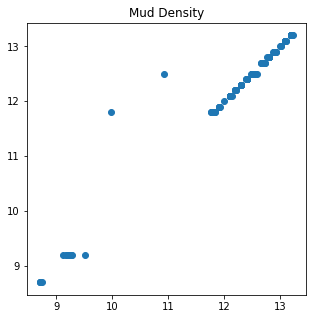

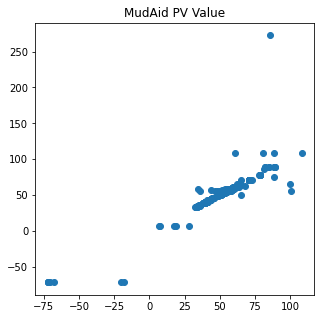

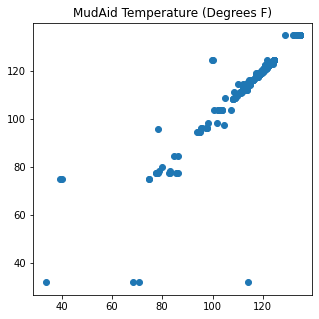

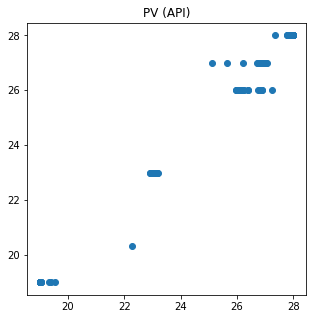

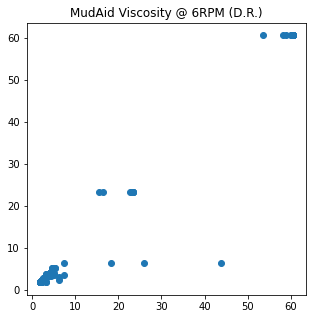

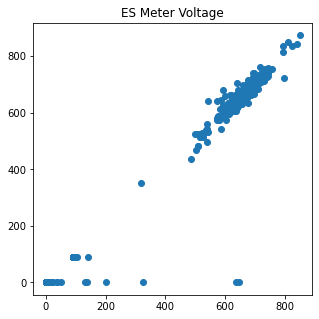

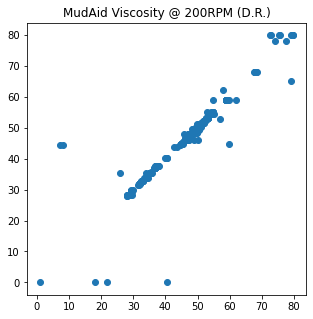

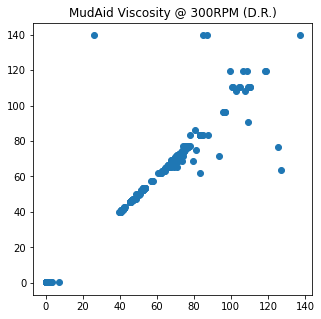

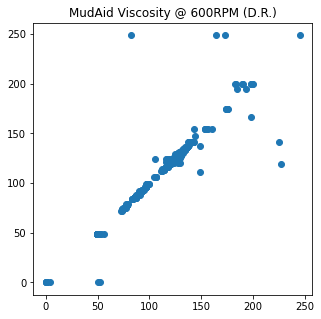

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

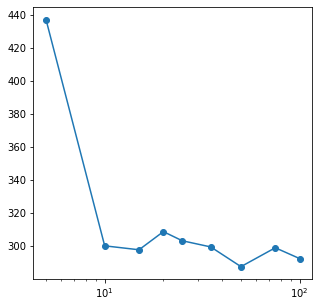

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = RandomForestRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [76]:
md[argmin(mse_values)]

50

In [77]:
min(mse_values)

287.5267460843337

/tmp/ipykernel_376774/9264795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]


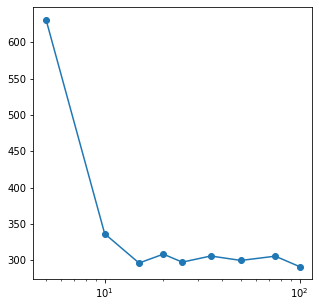

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = ExtraTreesRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [81]:
md[argmin(mse_values)]

100

In [82]:
min(mse_values)

291.439778165329

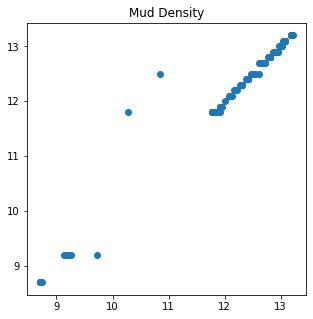

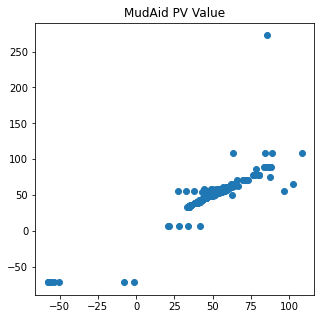

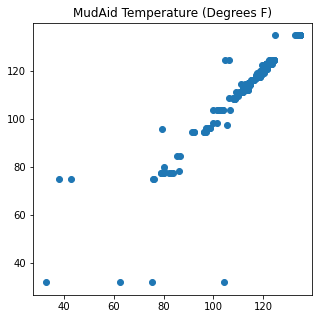

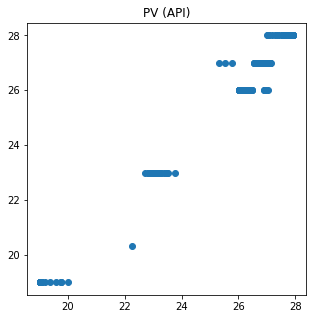

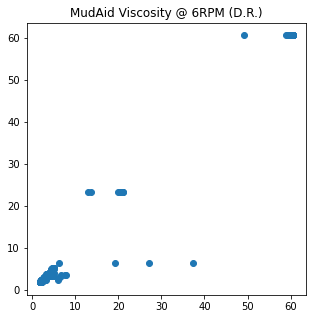

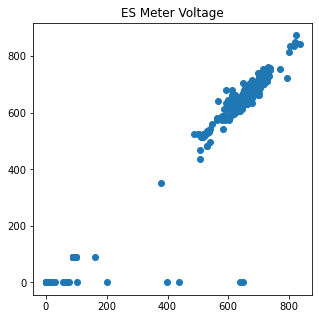

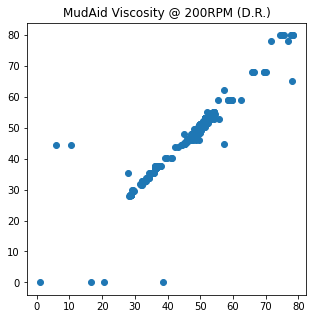

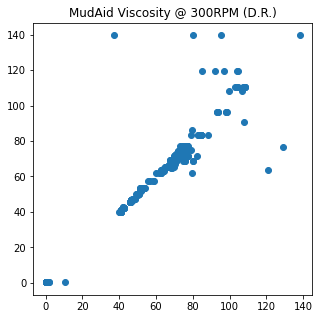

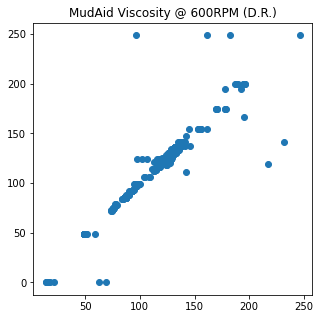

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=10, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

In [84]:
X.columns

Index(['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure'],
      dtype='object')

# dif = 50 

# Predicting mud properties from the other features

In [86]:
cols1 = ['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure']

cols2 = ['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)']

data10 = make_df(data, 50, cols1, cols2)

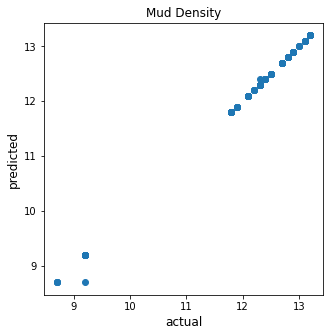

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Mud Density', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
# plt.savefig('example_ Mud Density all magnitudes.png', dpi = 500)
plt.show()

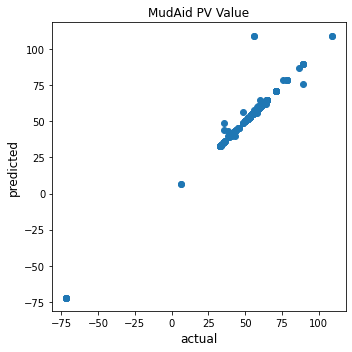

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['MudAid PV Value']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=60)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-100,150)
# plt.xlim(-100,150)
plt.title('MudAid PV Value', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ MudAid PV Value all magnitudes.png', dpi = 500)
plt.show()

# Predicting MudWatcher Temperature (Degrees F)


# multitarget regression

In [99]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 52.027 (3.141)


In [100]:
from sklearn.metrics import mean_squared_error

def get_mse(y_test, y_pred):
    me = []
    for i in range(len(y_test.columns)):
        mse1 = mean_squared_error(y_pred.T[i], y_test[y_test.columns[i]])
        # print(mse1)
        me.append(mse1)
    return min(me), max(me), np.mean(me), me

In [101]:
cols1 = ['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure']

cols2 = ['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)']

data10 = make_df(data, 50, cols1, cols2)

/tmp/ipykernel_376774/2540686986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]


523.6449421047942
0.0020208006848768186


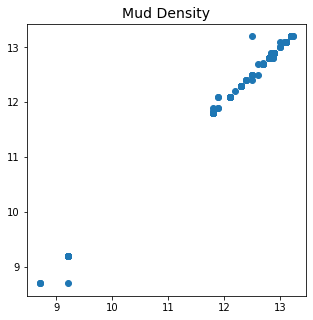

32.55207522287453


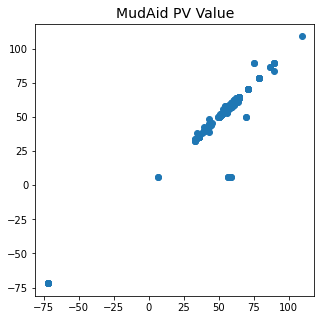

7.954957303099599


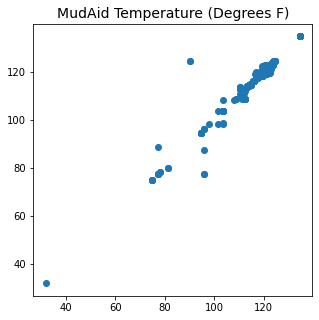

0.05708577522366777


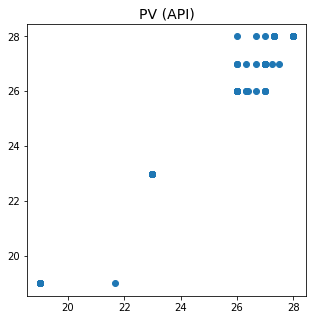

0.02331679705478668


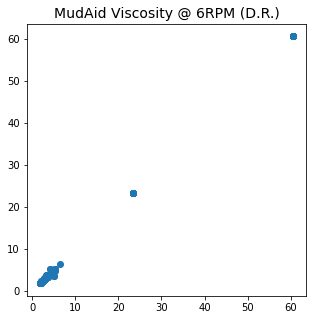

4614.747264928109


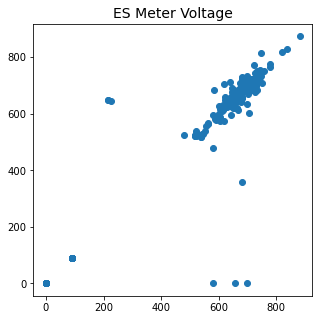

3.5098974134627627


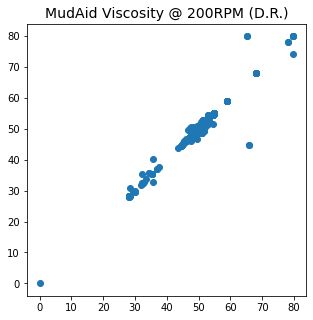

34.66311087958426


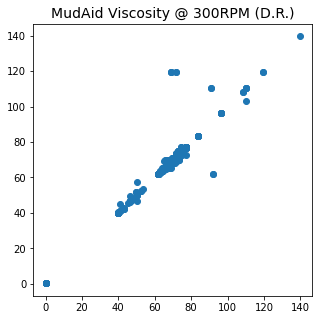

19.294749823053223


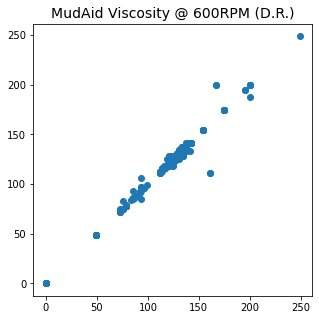

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=20, min_samples_split=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)


for i in range(len(Y.columns)):
    print(mse[i])
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], fontsize = 14)
    plt.show()

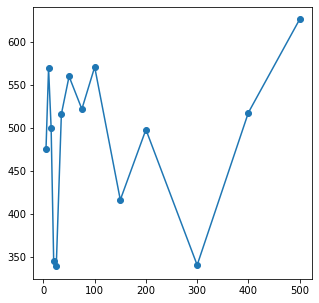

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100, 150, 200, 300, 400, 500]
mse_values = []
for i in md:
    model = DecisionTreeRegressor(max_depth=i, min_samples_split=4)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
# plt.xscale('log')
plt.show()

In [104]:
min(mse_values)

338.62074026843294

In [105]:
md[argmin(mse_values)]

25

387.8300674725751


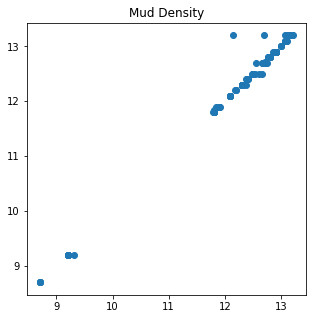

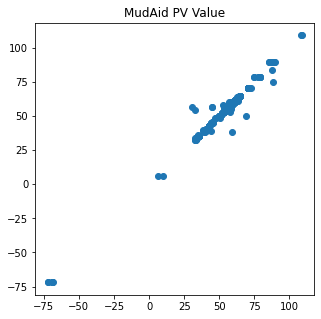

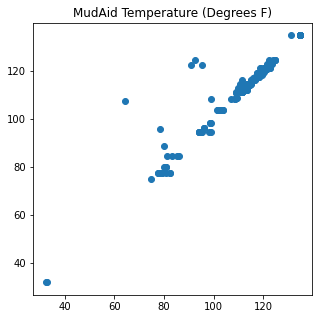

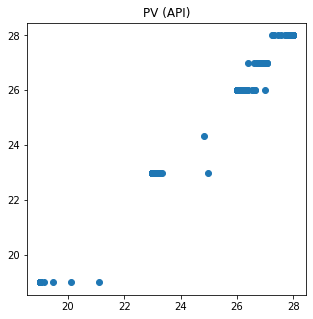

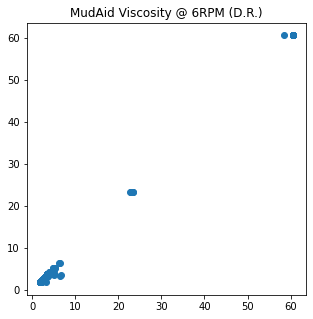

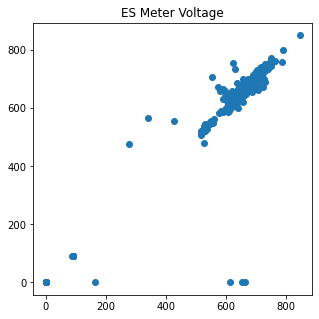

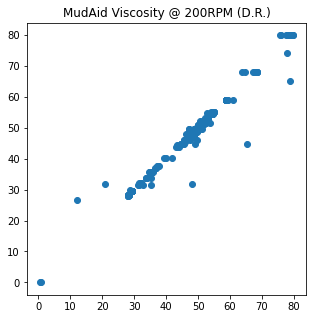

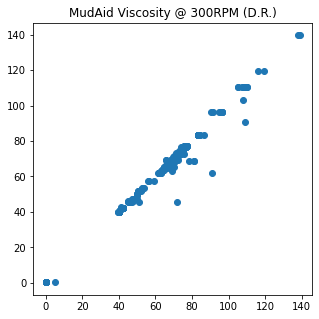

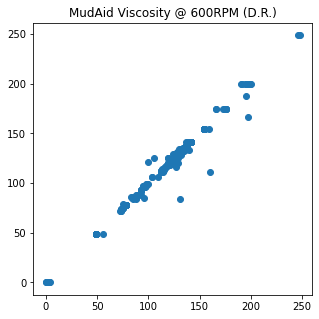

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = RandomForestRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

369.2558452650471


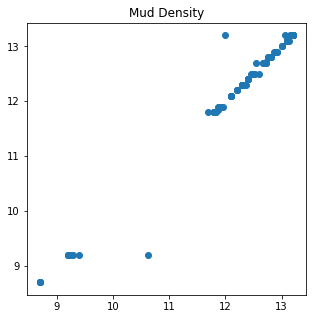

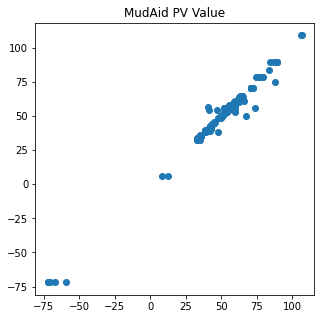

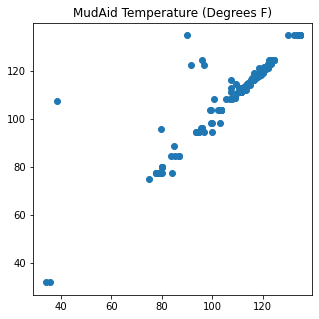

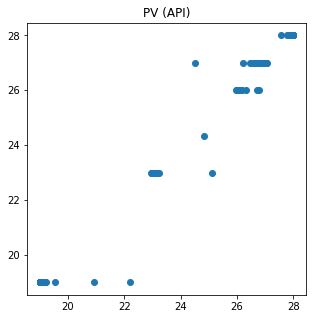

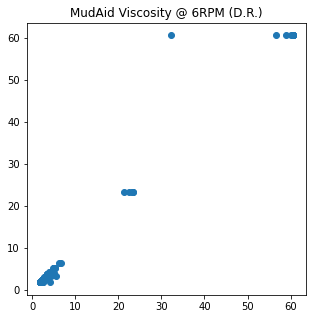

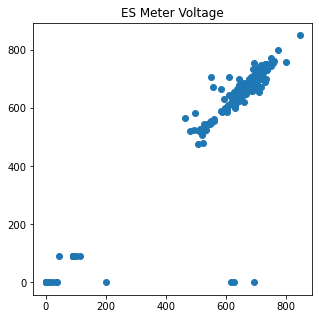

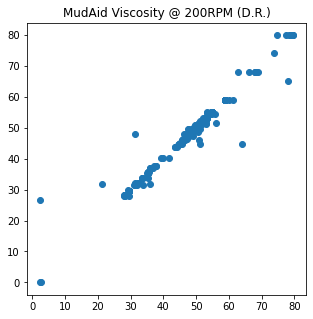

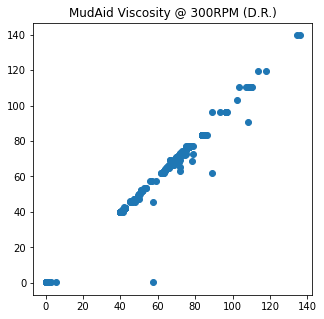

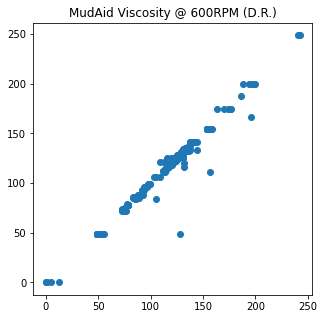

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

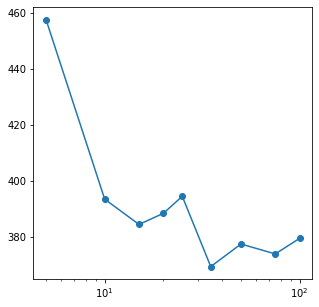

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = RandomForestRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [109]:
md[argmin(mse_values)]

35

In [110]:
min(mse_values)

369.428862336758

/tmp/ipykernel_376774/9264795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]


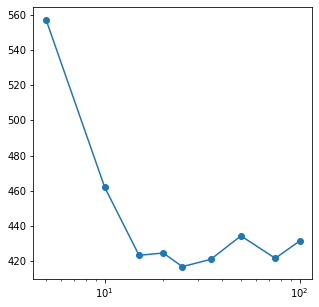

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = ExtraTreesRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [112]:
md[argmin(mse_values)]

25

In [113]:
min(mse_values)

416.8618744386662

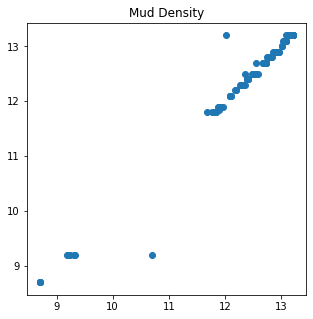

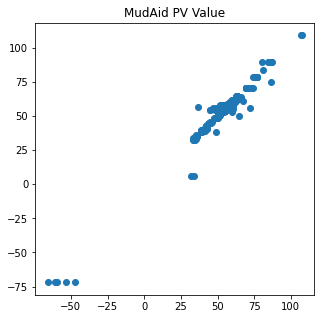

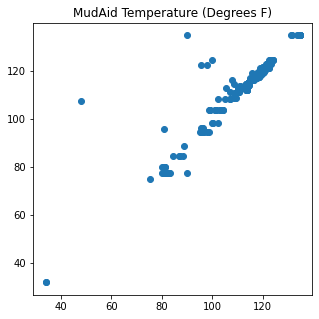

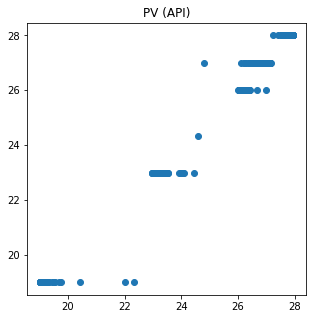

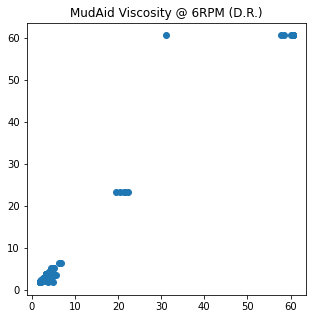

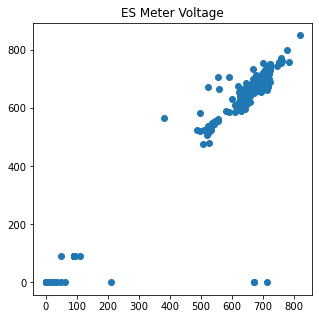

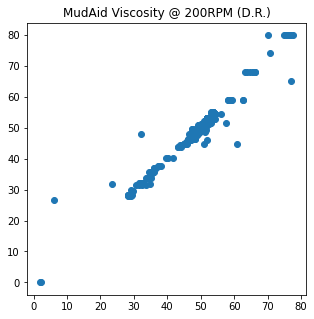

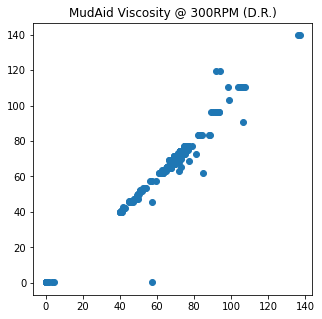

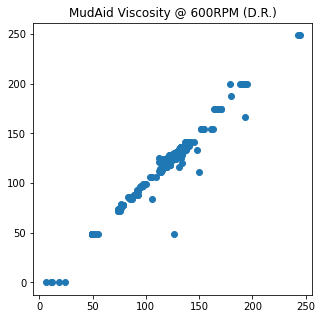

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data10[cols1]

# for i in range(len(X.columns)):
#     for j in range(i):
#         X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=10, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

In [84]:
X.columns

Index(['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure'],
      dtype='object')